In [2]:
# Import general utilities
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Import TDA utilities
from ripser import Rips
from tadasets import torus, sphere
import persim
from persim import plot_diagrams
# Import Scikit-Learn tools
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
import random
from ripser import ripser
from persim.landscapes import (
    PersLandscapeApprox,
    average_approx,
    snap_pl,
    plot_landscape,
    PersLandscapeExact,
    plot_landscape_simple
)
from tadasets import dsphere

In [4]:
# Instantiate datasets
data_torus = torus(n=100, c=2, a=1)
data_sphere = sphere(n=100, r=2)

In [ ]:
sph2_pl1 = []
sph3_pl1 = []

for _ in range(num_runs):
    sph2 = dsphere(n=num_pts, d=2)/1.3333 # sample points, scaling appropriately
    sph2_dgm = ripser(sph2, maxdim=2)['dgms'] # compute PH0, PH1, PH2
    sph2_pl = PersLandscapeApprox(dgms=sph2_dgm, hom_deg=1) # compute persistence landscape
    sph2_pl1.append(sph2_pl)

    sph3 = dsphere(n=num_pts, d=3)/1.3581 # sample points, scaling appropriately
    sph3_dgm = ripser(sph3, maxdim=2)['dgms'] # compute PH0, PH1, PH2
    sph3_pl = PersLandscapeApprox(dgms=sph3_dgm, hom_deg=1) # compute persistence landscape
    sph3_pl1.append(sph3_pl)

In [6]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [7]:
# Getting the (birth,death) pairs
def drawLineColored(X, C):
    for i in range(X.shape[0]-1):
        plt.plot(X[i:i+2, 0], X[i:i+2, 1], c=C[i, :], lineWidth = 3)

def plotCocycle2D(D, X, cocycle, thresh):
    """
    Given a 2D point cloud X, display a cocycle projected
    onto edges under a given threshold "thresh"
    """
    #Plot all edges under the threshold
    N = X.shape[0]
    t = np.linspace(0, 1, 10)
    c = plt.get_cmap('Greys')
    C = c(np.array(np.round(np.linspace(0, 255, len(t))), dtype=np.int32))
    C = C[:, 0:3]

    for i in range(N):
        for j in range(N):
            if D[i, j] <= thresh:
                Y = np.zeros((len(t), 2))
                Y[:, 0] = X[i, 0] + t*(X[j, 0] - X[i, 0])
                Y[:, 1] = X[i, 1] + t*(X[j, 1] - X[i, 1])
                drawLineColored(Y, C)
    #Plot cocycle projected to edges under the chosen threshold
    for k in range(cocycle.shape[0]):
        [i, j, val] = cocycle[k, :]
        if D[i, j] <= thresh:
            [i, j] = [min(i, j), max(i, j)]
            a = 0.5*(X[i, :] + X[j, :])
            plt.text(a[0], a[1], '%g'%val, color='b')
    #Plot vertex labels
    for i in range(N):
        plt.text(X[i, 0], X[i, 1], '%i'%i, color='r')
    plt.axis('equal')

AttributeError: 'function' object has no attribute 'ripser'

In [8]:
# Compute persistence diagrams
dgms_torus = rips.fit_transform(data_torus)
dgms_sphere = rips.fit_transform(data_sphere)

In [15]:
len(dgms_torus)

3

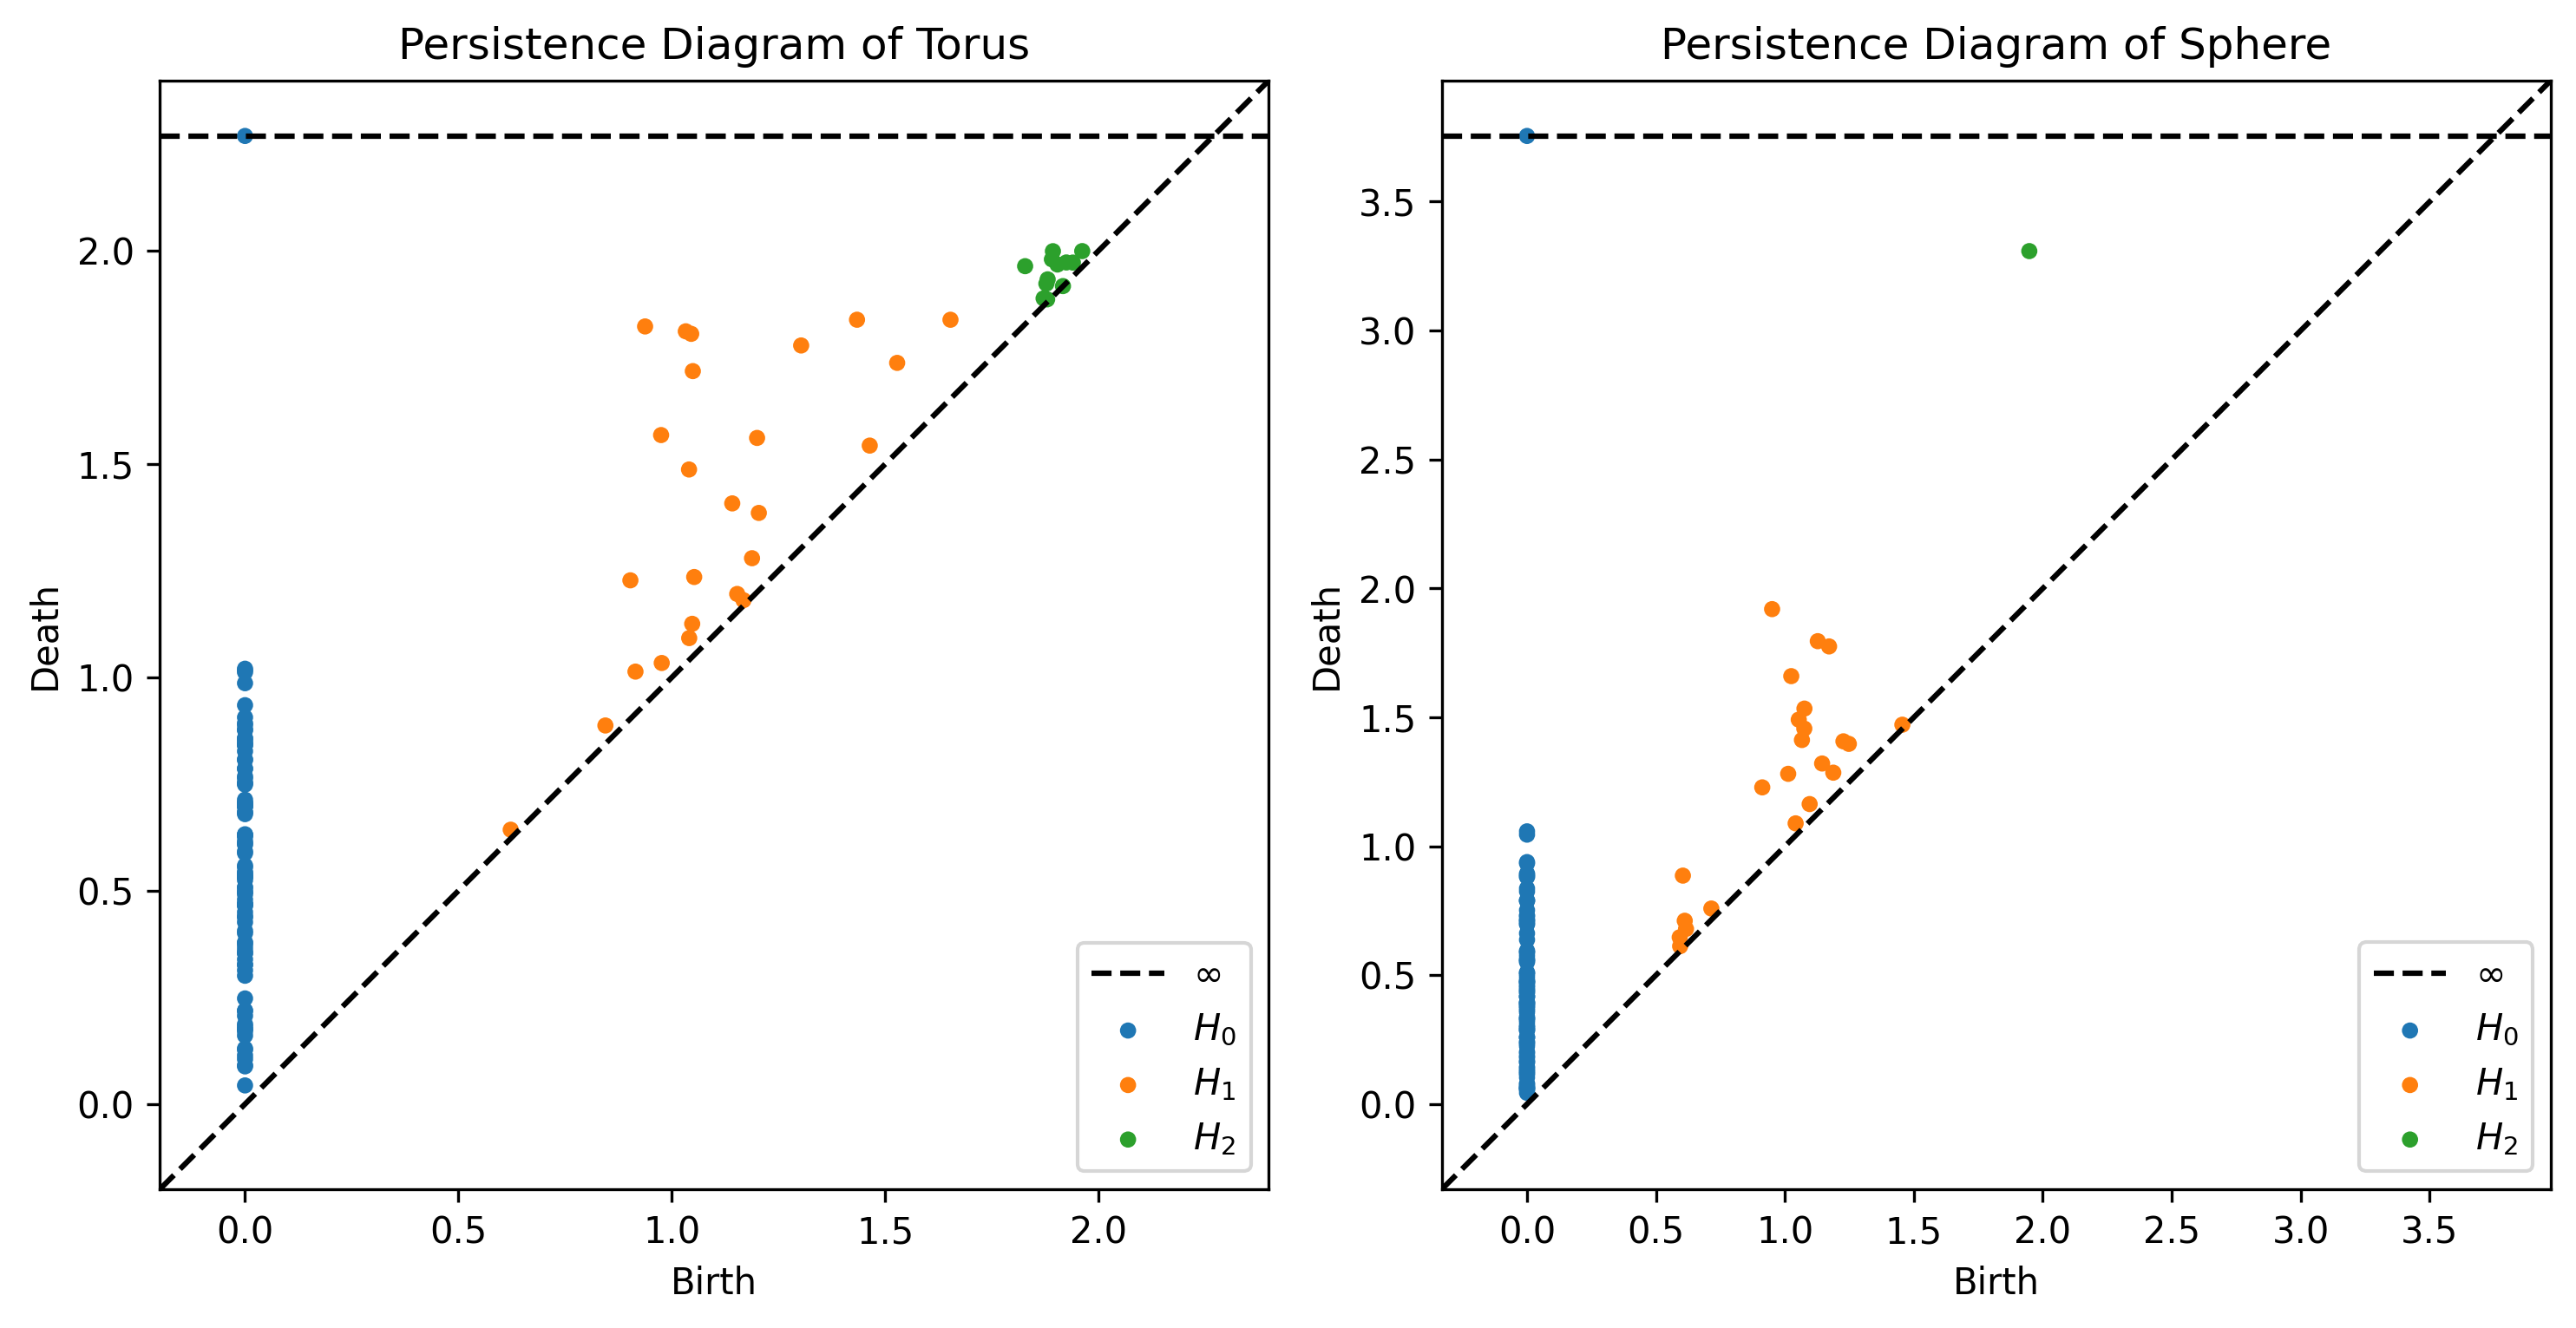

In [24]:
# Plot persistence diagrams
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

persim.plot_diagrams(dgms_torus, title="Persistence Diagram of Torus", ax=axs[0])

persim.plot_diagrams(dgms_sphere, title="Persistence Diagram of Sphere", ax=axs[1])

fig.tight_layout()

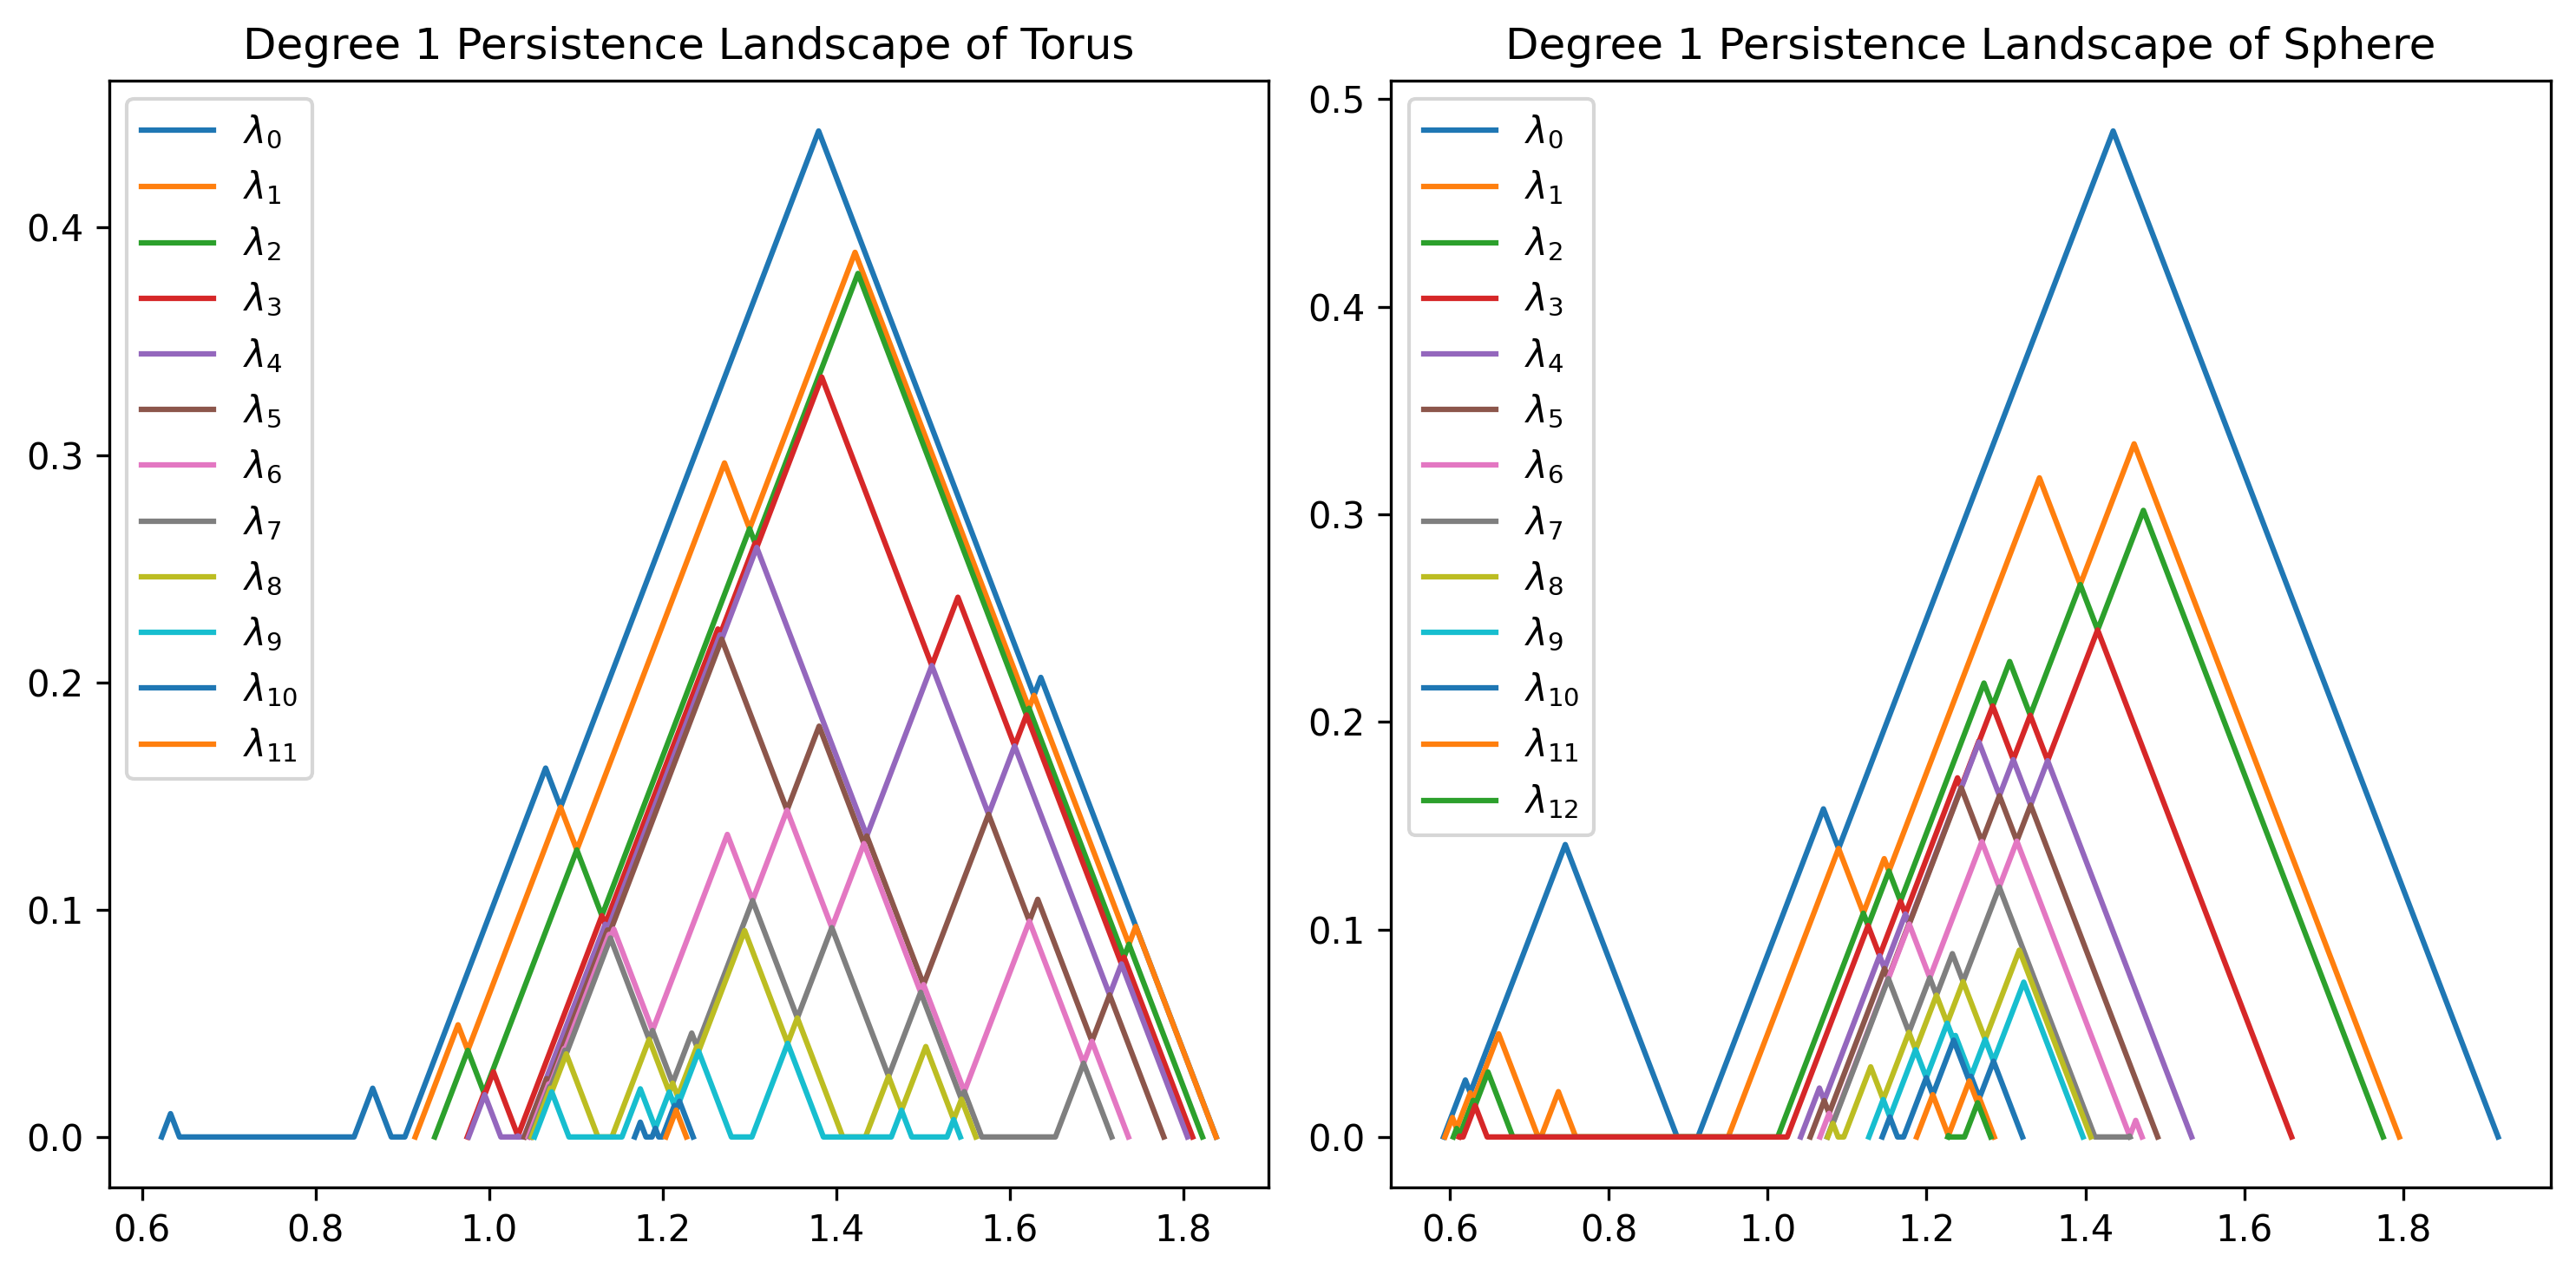

In [26]:
# Plot persistence landscapes
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

persim.landscapes.plot_landscape_simple(persim.landscapes.PersLandscapeExact(dgms_torus, hom_deg=1),
                             title="Degree 1 Persistence Landscape of Torus", ax=axs[0])

persim.landscapes.plot_landscape_simple(persim.landscapes.PersLandscapeExact(dgms_sphere, hom_deg=1),
                            title="Degree 1 Persistence Landscape of Sphere", ax=axs[1])

fig.tight_layout()

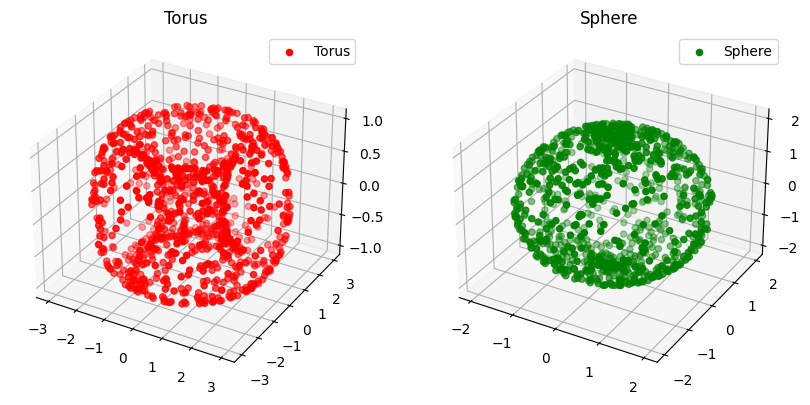

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tadasets import torus, sphere

# Instantiate datasets
data_torus = torus(n=1000, c=2, a=1)
data_sphere = sphere(n=1000, r=2)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot data_torus
ax1.scatter(data_torus[:, 0], data_torus[:, 1], data_torus[:, 2], color='red', label='Torus')
ax1.set_title('Torus')
ax1.legend()

# Plot data_sphere
ax2.scatter(data_sphere[:, 0], data_sphere[:, 1], data_sphere[:, 2], color='green', label='Sphere')
ax2.set_title('Sphere')
ax2.legend()

# Show the plots
plt.show()

